## Play-ground to make initial data distributions.

In [1]:
#import Pkg; Pkg.add("FileIO")
using Distributions
using Plots
using FileIO
using JLD2
using LaTeXStrings
#Pkg.instantiate()

In [2]:
include("aux_functions/inidat_aux_functions.jl")

f_x

In [4]:
N = 40_000
v = zeros(N)
vb = 5
for i in 1:N
    v[i] = distribution_stream(vb)
end

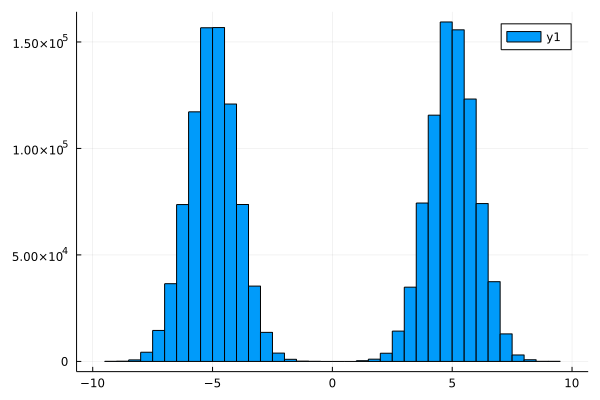

In [5]:
histogram(v, bins=:scott, weights=repeat(1:80, outer=500))

At first sigth they look very similar....

We now make and save some distributions to use as standard ones.

## Thermal Distributions

$$
f(x,v) = \frac{N}{L} \frac{1}{\sqrt{2\pi \theta}} e^{-\frac{v^2}{2\theta}}
$$

Thus, $\theta = \sigma^2$ is the variance of the distribution.

### Relativistic version

$$
f(x,p) = \frac{N}{L} \frac{1}{\sqrt{2\pi \theta}} e^{\frac{1 - \sqrt{1+\frac{p^2}{m^2}}}{2\theta}}
$$

In [6]:
#save("Initial_Distributions/par_dis_L5_N8_5_theta01.jld2", "par_dis", u)
#save("Initial_Distributions/par_dis_L5_N2_5_theta001.jld2", "par_dis", u)
#save("Initial_Distributions/par_dis_L5_N2_5_theta0001.jld2", "par_dis", u)
#save("Initial_Distributions/par_dis_L5_N2_5_theta00001.jld2", "par_dis", u)


## Landau Damping ##

The initial distribution is: 

$$
f(x,v,\alpha, k, \theta) = \frac{1}{\sqrt{2\pi \theta}} e^{-\frac{v^2}{2\theta}} (1 + \alpha cos(kx) )
$$

Since it is a product we can split into two distributions one for the position and one for the velocity.
The one for the velocity we already have, so we need to make only the random sampling of the spatial one. 

Some definitions $\hat{k} = k / k_D = k * \sqrt{\theta}$ Or $k = \hat{k} / \sqrt{\theta}$ 

In these simulations, $\theta = 10^{-3}$ $\sqrt{\theta} = 0.03162$

Thus to $\hat{k} = 0.01$ corresponds a $\lambda = 2\pi * \sqrt{\theta} / \hat{k} = 19.869$

For $\hat{k} = 0.40$ corresponds a $\lambda = 0.497$

For the first case an $L = 2 \lambda = 39.738$ is used and $J = 1761*2 = 3522$, $dx = L/J = 0.0112$

For the second $L=15*\lambda = 7.455$ is used and $J = 62 * 15 = 930$, $dx = 0.0080$

### Relativistic version

For the relativistic version we use the distribution (for momentum)

$$
f(p) = \frac{1}{4\pi m^3 c^3 \theta K^2(1/\theta)} e^{(1-\gamma) / \theta} \;\;\;\; \gamma = \sqrt{1+p^2}
$$

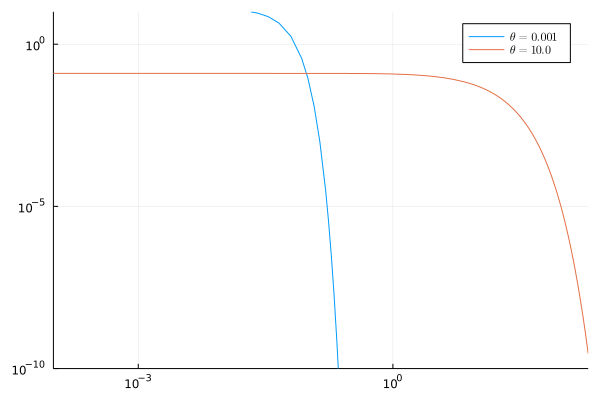

In [7]:
Plots.plot(u -> f_p_rel(u,(0.001,1))
, xscale=:log10, yscale=:log10, xlim=(0.0001,1), ylim=(1e-10,1e1)
, label=L"\theta = 0.001")
Plots.plot!(u -> f_p_rel(u,(10.,1))
, xscale=:log10, yscale=:log10, xlim=(0.0001,200)
, label=L"\theta = 10.0")

In [3]:
damped = false
undamped_s = false
undamped_l = false
vlasov_exp_200 = false
vlasov_exp_40 = false
damped = true
#undamped_s = true

#vlasov_exp_200 = true
#vlasov_exp_40 = true

N_exp = 6
N = 8*10^(N_exp)

data_name = "par_dis_landau_norm_norel_"

if undamped_l
    L= 39.738 
    #m = 20 # 
    m = 2
    data_name = data_name * "undamped_l_$(m)_"
elseif undamped_s
    L= 4 
    #m = 20 # 
    m = 2 # this corresponds to a k approx 0.1
    data_name = data_name * "undamped_s_$(m)_"
elseif damped
    L = 7.455
    m = 15 # 12, 15, 19
    data_name = data_name * "damped_$(m)_"
elseif vlasov_exp_200
    L = 200.
    #m = 2
    m = 10
    data_name = data_name * "vla_200_$(m)_"
elseif vlasov_exp_40
    L = 40.
    m = 2
    data_name = data_name * "vla_40_$(m)_"
end


k = 2π*m/L # this here is k, not \hat{k}
alpha_exp = 2
α = 10.0^(-alpha_exp) # 0.1 0.001

exp_Theta = 3
θ = 10.0^(-exp_Theta)

interval_x = (0.0,L)
p_max = sqrt((1+10*θ)^2-1) 
interval_p = (0, p_max) # we then antisymmetrize to get the negative values.
par_f_x = (α, m, L)

#@show length([m]) 
par_f_p_1 = (θ,1) #to compute the norm of f_p
par_init = (N,)
norm = norm_f_p_rel(f_p_rel,par_f_p_1,20000,p_max)
par_f_p = (θ,norm)

data_name = data_name * "alp$(alpha_exp)_8$(N_exp)_Th$(exp_Theta)"

#build_initial_data(data_name::String, par_init, f_x, f_x_max, par_f_x, interval_x, f_p_rel, f_p_rel_max, par_f_p, interval_p);
build_initial_data(data_name::String, par_init, f_x, f_x_max, par_f_x, interval_x, f_p, f_p_max, par_f_p, interval_p);

UndefVarError: UndefVarError: f_p not defined

In [4]:
par_dis, run_name, pars, par_f_x, par_f_p = retrieve_initial_data("Initial_Distributions/" * data_name * ".jld2")

@show run_name, pars, par_f_x, par_f_p

(run_name, pars, par_f_x, par_f_p) = ("par_dis_landau_norm_norel_damped_15_alp2_86_Th3", (8000000,), (0.010000000000000002, 15, 7.455), (0.001, 1.0003670751902618))


("par_dis_landau_norm_norel_damped_15_alp2_86_Th3", (8000000,), (0.010000000000000002, 15, 7.455), (0.001, 1.0003670751902618))

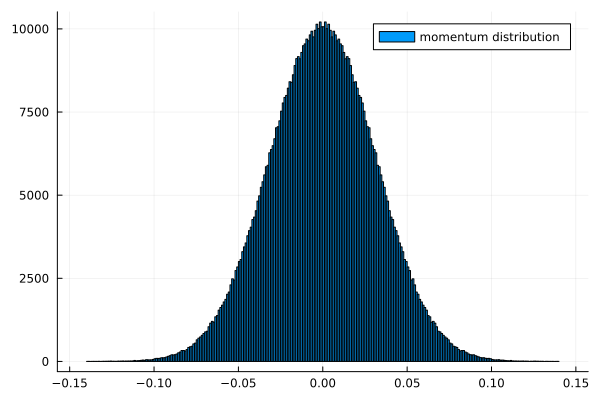

In [5]:
histogram(par_dis[N+1:2N], label="momentum distribution")

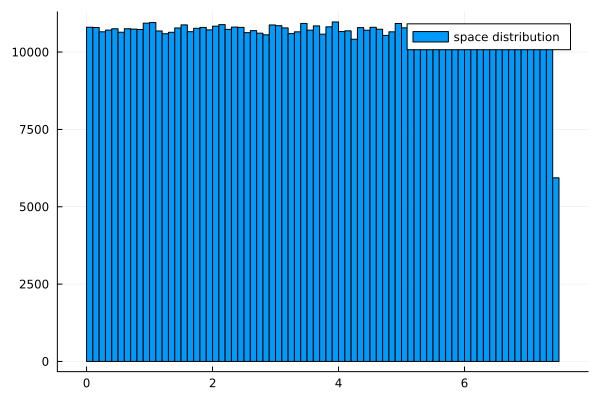

In [11]:
histogram(par_dis[1:N], label="space distribution")

## 2D Distributions

In [3]:
const D = 2

2

In [4]:
include("aux_functions/inidat_aux_functions.jl")

damped = false
undamped_s = false
undamped_l = false
vlasov_exp_200 = false
vlasov_exp_40 = false
damped = false
thermal_40 = false
thermal = false
weibel = false
weibel_norel = false
#undamped_s = true
no_rel = true
#trys = true
#thermal = true
weibel = true
#weibel_norel = true

#vlasov_exp_200 = true
#vlasov_exp_40 = true

N_exp = 7
N = 10^(N_exp)

no_rel = false

if no_rel
    data_name = "par_dis_norel_"
else
    data_name = "par_dis_rel_"
end


#data_name = data_name * "_thermal_40"

if  thermal
    Box_x = (0.0,1.0,0.0,1.0) 
    nm = [1,1]
    Box_array = [i for i in Box_x]
    k = 2π*nm./(Box_array[2:2:end]-Box_array[1:2:end-1]) # this here is k, not \hat{k}
    alpha_exp = 8
    α = 10.0^(-alpha_exp) # 0.1 0.001
    par_f_x = (α, nm, Box_x)
    exp_Theta = 3
    θ = 10.0^(-exp_Theta)
    p_max = sqrt((1+10*θ)^2-1) 
    Box_p = (-p_max,p_max,-p_max,p_max)
    f_p = f_p_thermal
    par_f_p = (θ,D)
    #par_f_p_1 = (θ,1,D) #to compute the norm of f_p
    #norm = int_mid_point_f(f_p_rel, par_f_p_1, [20_000,20_000], Box_p)
    #par_f_p_rel = (θ,norm,D)
    data_name = data_name * "thermal_" * "nm_[$(nm[1]),$(nm[2])]_"
    data_name = data_name * "alp$(alpha_exp)_N$(N_exp)_Th$(exp_Theta)"
elseif weibel_norel
    Box_x = (0.0,1.0,0.0,1.0) 
    Ax = 24 # velocity anisotropy in the x direction
    alpha_exp = 8 # 8 so that is extremely small i.e. zero
    α = 10.0^(-alpha_exp) # 0.1 0.001
    par_f_x = (α, [0.0,0.0], Box_x)
    exp_Theta = 3
    θ = 10.0^(-exp_Theta)
    p_max = sqrt((1+10*10*θ)^2-1) # we put an extra factor 10 because we should consider the highets temperature
    Box_p = (-p_max,p_max,-p_max,p_max)
    f_p = f_p_weibel_norel
    f_p_max = f_p_weibel_norel_max
    par_f_p = (θ,D,Ax)
    data_name = data_name * "weibel_norel_" * "Ax_(1d2)_"
    data_name = data_name * "alp$(alpha_exp)_N$(N_exp)_Th$(exp_Theta)"
elseif weibel #relativistic
    Box_x = (0.0,1.0,0.0,1.0) 
    Ax = 25 # 25 # velocity anisotropy in the x direction
    alpha_exp = 8 # 8 so that is extremely small i.e. zero
    α = 10.0^(-alpha_exp) # 0.1 0.001
    par_f_x = (α, [0.0,0.0], Box_x)
    exp_Theta = 3
    @show θ1 = 10.0^(-exp_Theta)
    @show θ2 = Ax*θ1
    #p_max = sqrt((1+10*θ2)^2-1) # we put the largest here
    @show p_max = 10*θ2 # 10*θ2
    Box_p = (-p_max,p_max,-p_max,p_max)
    f_p = f_p_weibel
    f_p_max = f_p_weibel_max
    par_f_p_1 = (θ1,θ2,[0.5,0.0], 1, D)
    data_name = data_name * "weibel_" * "Ax_$(Ax)_"
    data_name = data_name * "alp$(alpha_exp)_N$(N_exp)_Th$(exp_Theta)"
    @show norm = int_mid_point_f(f_p, par_f_p_1, [20_000,20_000], Box_p)
    par_f_p = (θ1,θ2,[0.5,0.0], norm, D)
end

 
par_init = (N,)


build_initial_data_D(data_name::String, par_init, f_x, f_x_max, par_f_x, Box_x, f_p, f_p_max, par_f_p, Box_p)


θ1 = 10.0 ^ -exp_Theta = 0.001
θ2 = Ax * θ1 = 0.025
p_max = 10θ2 = 0.25
norm = int_mid_point_f(f_p, par_f_p_1, [20000, 20000], Box_p) = 

0.007760848597927437


D = 2


40000000-element Vector{Float64}:
  0.11684213837014135
  0.6542307815015955
 -0.11305653308614072
  0.03614671990748186
  0.38161567275202934
  0.6487998410708102
  0.09140138832287542
 -0.06194640585195099
  0.6158670346882703
  0.8795250439972595
  ⋮
 -0.040741925016092195
  0.3643971142189606
  0.8365728805934565
  0.03897338690086466
 -0.020864962723584235
  0.8827298843204118
  0.5569078086073327
  0.06878559788530836
  0.05480942208958556

In [5]:
par_dis, run_name, pars, par_f_x, Box_x, par_f_p, Box_p = retrieve_initial_data_D("Initial_Distributions/" * data_name * ".jld2")

([0.11684213837014135, 0.6542307815015955, -0.11305653308614072, 0.03614671990748186, 0.38161567275202934, 0.6487998410708102, 0.09140138832287542, -0.06194640585195099, 0.6158670346882703, 0.8795250439972595  …  -0.035622094308263685, -0.040741925016092195, 0.3643971142189606, 0.8365728805934565, 0.03897338690086466, -0.020864962723584235, 0.8827298843204118, 0.5569078086073327, 0.06878559788530836, 0.05480942208958556], "par_dis_rel_weibel_Ax_25_alp8_N7_Th3", (10000000,), (1.0e-8, [0.0, 0.0], (0.0, 1.0, 0.0, 1.0)), (0.0, 1.0, 0.0, 1.0), (0.001, 0.025, [0.5, 0.0], 0.007760848597927437, 2), (-0.25, 0.25, -0.25, 0.25))

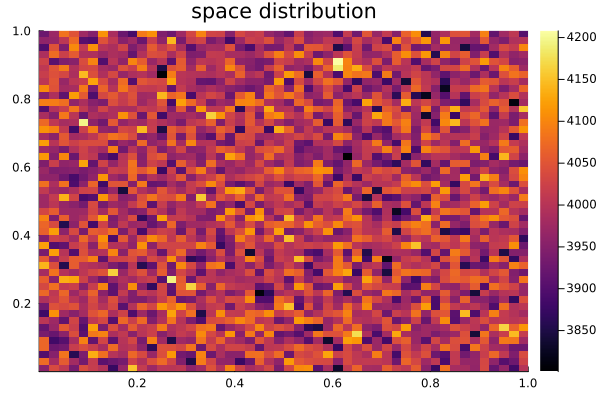

In [6]:
plot(histogram2d(par_dis[1:2D:end],par_dis[2:2D:end], title="space distribution" ))

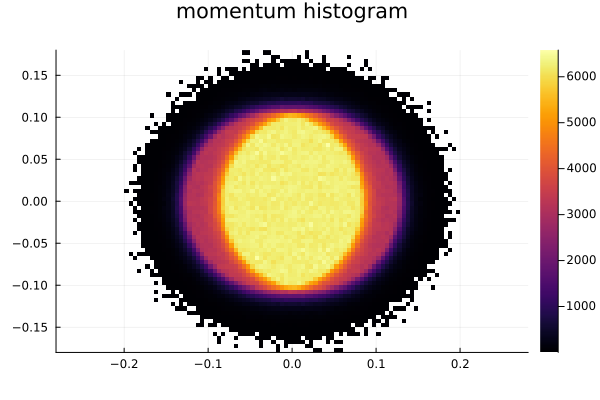

In [7]:
plot(histogram2d(par_dis[3:4:end],par_dis[4:4:end],nbinsx=40, nbinsy=40)
,aspectratio=1
,title = "momentum histogram"
)

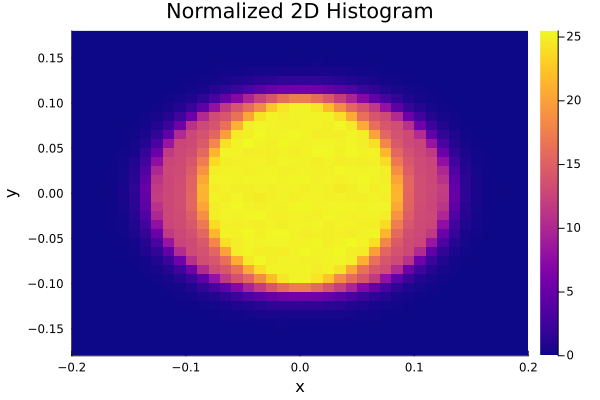

In [8]:
histogram2d(par_dis[3:4:end],par_dis[4:4:end], bins=(40, 40), show_empty_bins=true,
    normalize=:pdf,  color=:plasma)
title!("Normalized 2D Histogram")
xlabel!("x")
ylabel!("y")

In [9]:
#include("inidat_aux_functions.jl")
T = get_temperature_rel_D(par_dis,N,D)

0.003491293879529369

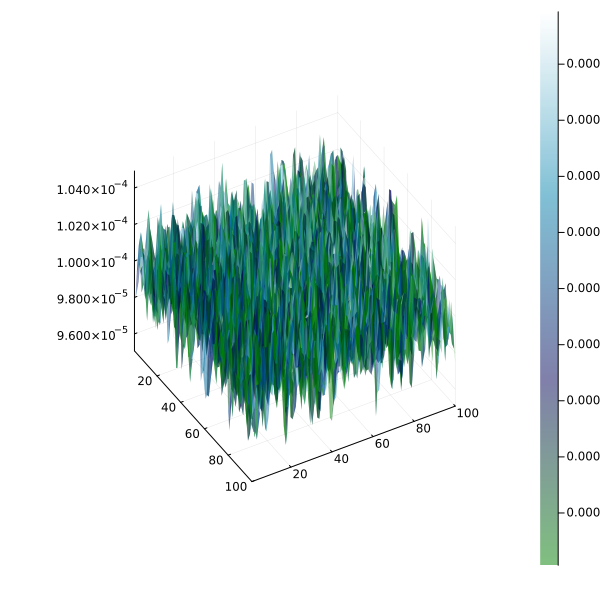

In [11]:
J = (100,100)
par_grid = (N, Box_x, J, 5)
n = zeros(J[1],J[2])

get_density_2D!(par_dis, n, par_grid)

plot_matrix(n)

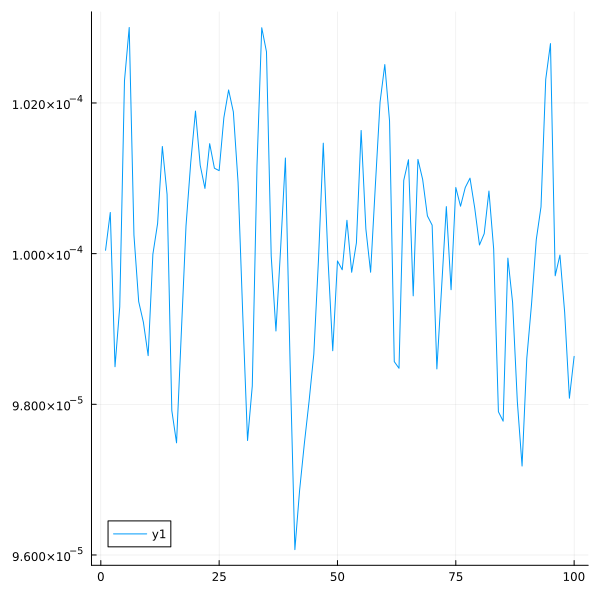

In [12]:
plot(n[:,5])

In [13]:
sum(n)

0.9999999999999996

In [16]:
#J = (100,80)
get_current_2D_trans = Current2DTrans(N, J)
S = get_current_2D_trans(Val(5), Box_x, par_dis)
@show sum(S[:,:,1])

sum(S[:, :, 1]) = 4.743384504624082e-20


4.743384504624082e-20

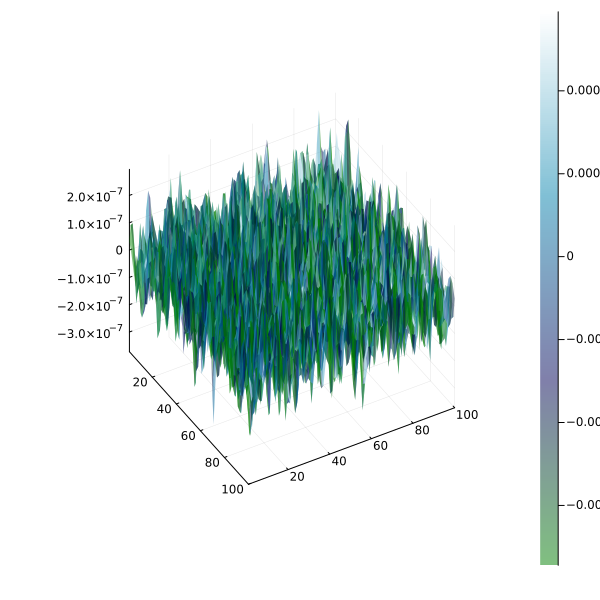

In [17]:
plot_matrix(S[:,:,1])

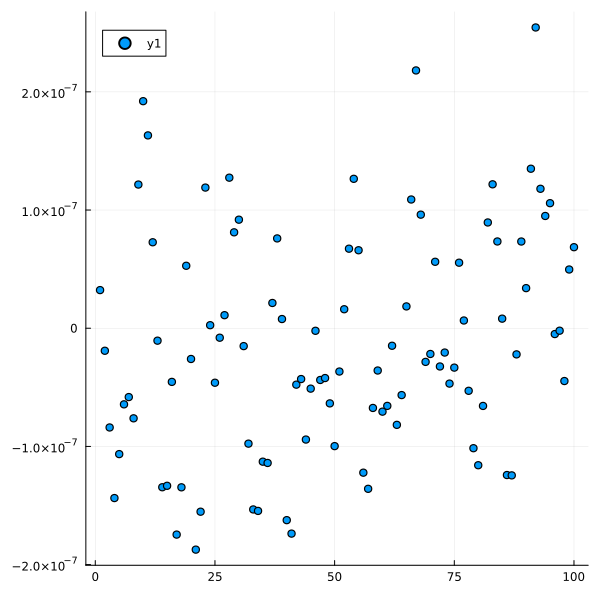

In [18]:
Plots.scatter(S[1,:,1])